# Descriptive statistics

In [1]:
import os
import pandas as pd
import numpy as np  # for NaN

In [2]:
from itertools import product

In [3]:
from scipy.stats import pearsonr

In [4]:
import matplotlib.pyplot as plt

### Import data

In [5]:
dir_files = '../data/organisational_audit/processed'
file_excel = 'processed_2019_portfolio_key_indicators_summary_numeric_shap.csv'

In [6]:
df = pd.read_csv(os.path.join(dir_files, file_excel), index_col=0)

In [10]:
df = df.drop(['team_samuel', 'stroke_team_id', 'Rank'], axis='columns')

In [11]:
df

,acute_unit,bed1,bed3,ki_total,ki1,ki1_nurses6_wte,ki1_nurses7_wte,ki2,ki2_psych_wte,ki3,...,ki9_tia_outpatient_timescale_sameday,ki9_tia_outpatient_timescale_samedayexcludingweekends,ki9_tia_outpatient_timescale_withinmonth,ki9_tia_outpatient_timescale_withinweek,ki9_tia_outpatients_seen,ki10,ki10_management_chairmanofclinicalgovernance,ki10_management_executiveonboard,ki10_management_nonexecutiveonboard,shap_mean
Hospital names,,,,,,,,,,,,,,,,,,,,,
Queens Hospital Romford HASU,1.0,1.0,0.0,6.0,1,2.73,1.14,0,0.48,1,...,1,0,0,0,1,1,1,1,1,0.622612
Royal London Hospital HASU,1.0,1.0,0.0,5.0,1,2.85,0.38,0,0.23,1,...,0,1,0,0,1,0,0,0,0,0.671457
Charing Cross Hospital HASU,1.0,1.0,1.0,5.0,1,3.67,0.44,0,0.27,1,...,0,1,0,0,1,0,0,0,0,0.744570
King's College Hospital HASU,1.0,1.0,0.0,9.0,1,3.21,0.71,1,1.29,1,...,0,1,0,0,1,1,0,1,0,0.419903
Princess Royal University Hospital HASU,1.0,1.0,0.0,7.0,1,3.25,1.25,0,0.75,1,...,0,1,0,0,1,1,1,1,1,0.236947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Wales General,1.0,1.0,0.0,4.0,0,1.00,0.50,0,0.00,0,...,0,0,0,0,1,1,0,1,0,0.539088
Withybush General Hospital,1.0,1.0,0.0,3.0,0,1.11,0.56,0,0.00,0,...,0,0,0,1,1,1,0,1,0,0.712716
Prince Philip Hospital,1.0,1.0,0.0,3.0,0,0.87,0.43,0,0.00,0,...,0,0,0,1,1,1,0,1,0,0.245966


## Simple linking coefficients

In [12]:
cols = df.columns

In [13]:
grid = np.full((len(cols), len(cols)), 0.0)

for c, col_name in enumerate(cols):
    for r, row_name in enumerate(cols):
        if r <= c:
            p = pearsonr(df[col_name], df[row_name])
            grid[c, r] = p.statistic

/home/anna/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [14]:
ki_cols = [col.split('_')[0] for col in cols]
ki_cols = [int(col.split('ki')[-1]) if col.split('ki')[-1].isnumeric() else 0 for col in ki_cols]

In [15]:
# Find where the KI label changes:
w = np.diff(ki_cols)
inds_ki_changes = np.where(w != 0)[0]

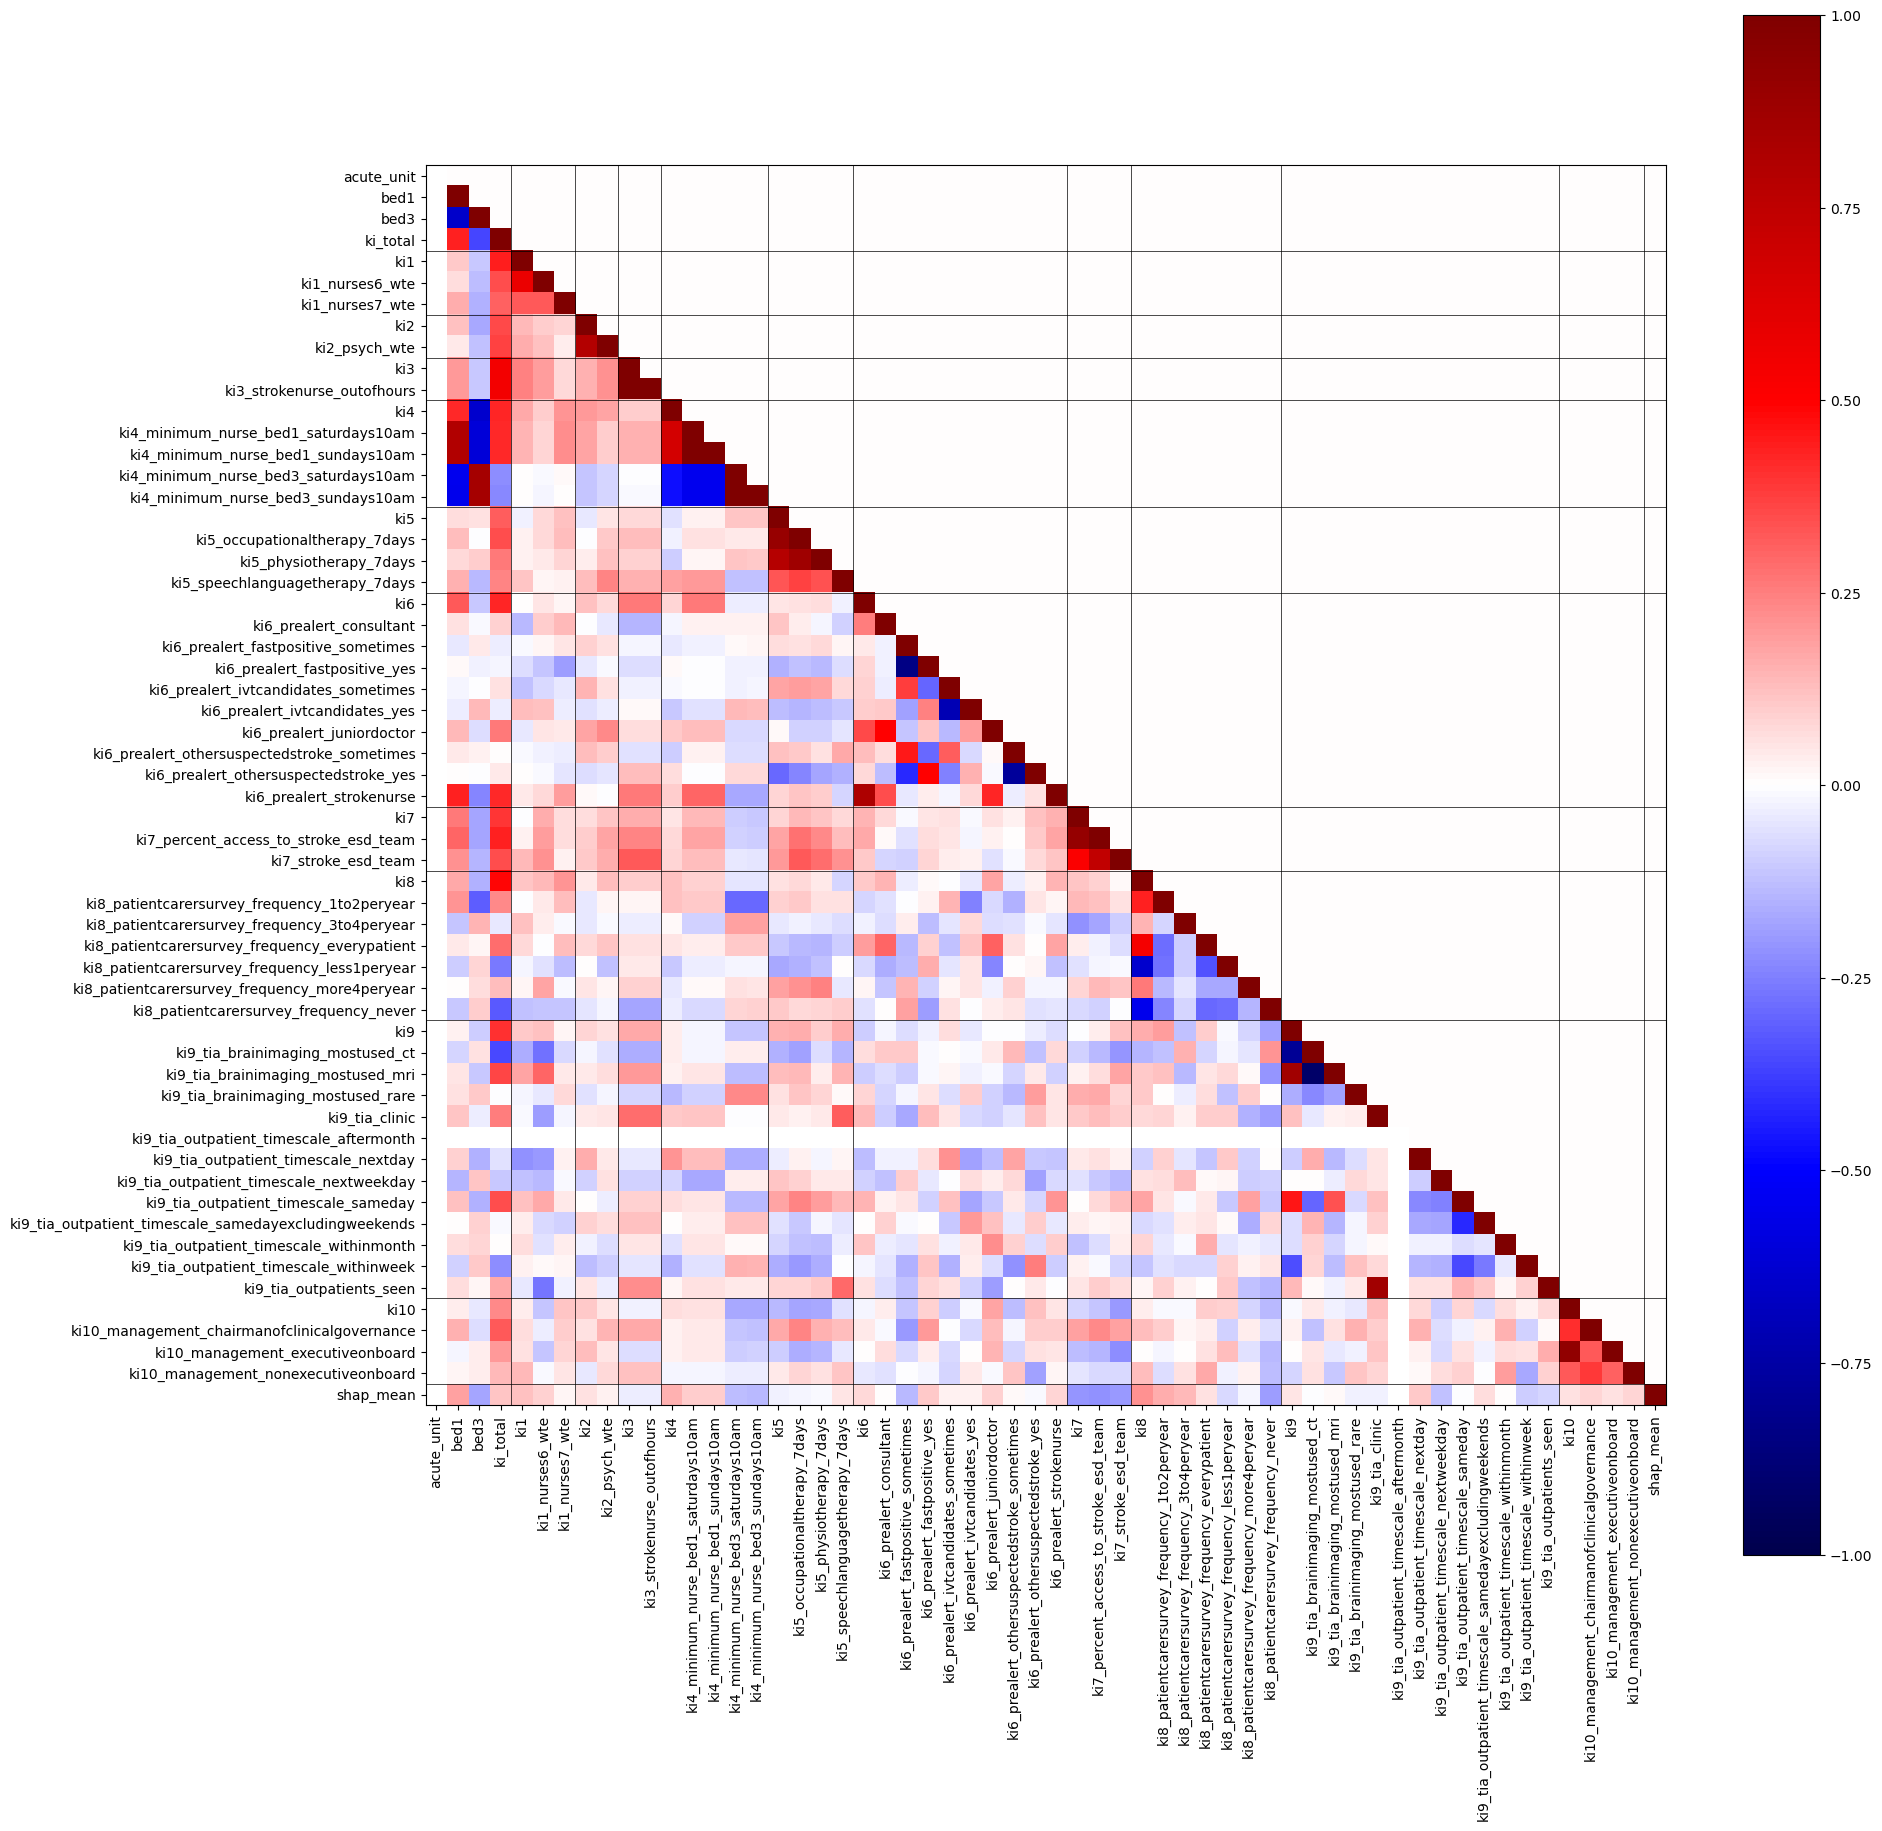

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))

c = ax.imshow(grid, vmin=-1.0, vmax=1.0, cmap='seismic')
plt.colorbar(c)

for x in inds_ki_changes:
    ax.axvline(x + 0.5, color='k', linewidth=0.5)
    ax.axhline(x + 0.5, color='k', linewidth=0.5)

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=90)
ax.set_yticklabels(cols)

plt.show()

## Only the main key indicators

In [17]:
cols_ki = [f'ki{i}' for i in range(1, 11)]
cols = cols_ki

In [18]:
grid = np.full((len(cols), len(cols)), 0.0)

for c, col_name in enumerate(cols):
    for r, row_name in enumerate(cols):
        if r <= c:
            p = pearsonr(df[col_name], df[row_name])
            grid[c, r] = p.statistic

In [19]:
ki_cols = [col.split('_')[0] for col in cols]
ki_cols = [int(col.split('ki')[-1]) if col.split('ki')[-1].isnumeric() else 0 for col in ki_cols]

In [20]:
# Find where the KI label changes:
w = np.diff(ki_cols)
inds_ki_changes = np.where(w != 0)[0]

In [21]:
ki_group_names = [
    'KI1: nurses per bed',
    'KI2: psychologist',
    'KI3: stroke nurses',
    'KI4: Minimum number of nurses',
    'KI5: therapy availability',
    'KI6: pre-alerts',
    'KI7: early supported discharge',
    'KI8: patient and carer survey',
    'KI9: brain imaging type',
    'KI10: leadership'
]

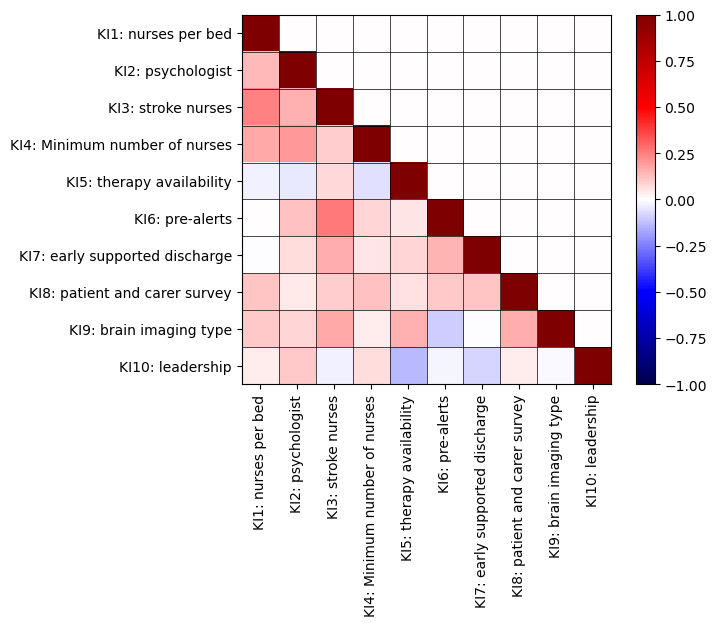

In [22]:
fig, ax = plt.subplots()

c = ax.imshow(grid, vmin=-1.0, vmax=1.0, cmap='seismic')
plt.colorbar(c)

for x in inds_ki_changes:
    ax.axvline(x + 0.5, color='k', linewidth=0.5)
    ax.axhline(x + 0.5, color='k', linewidth=0.5)

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(ki_group_names, rotation=90)
ax.set_yticklabels(ki_group_names)

plt.show()

In [23]:
df = df.sort_values('ki_total', ascending=False)

In [24]:
units = df.index.values

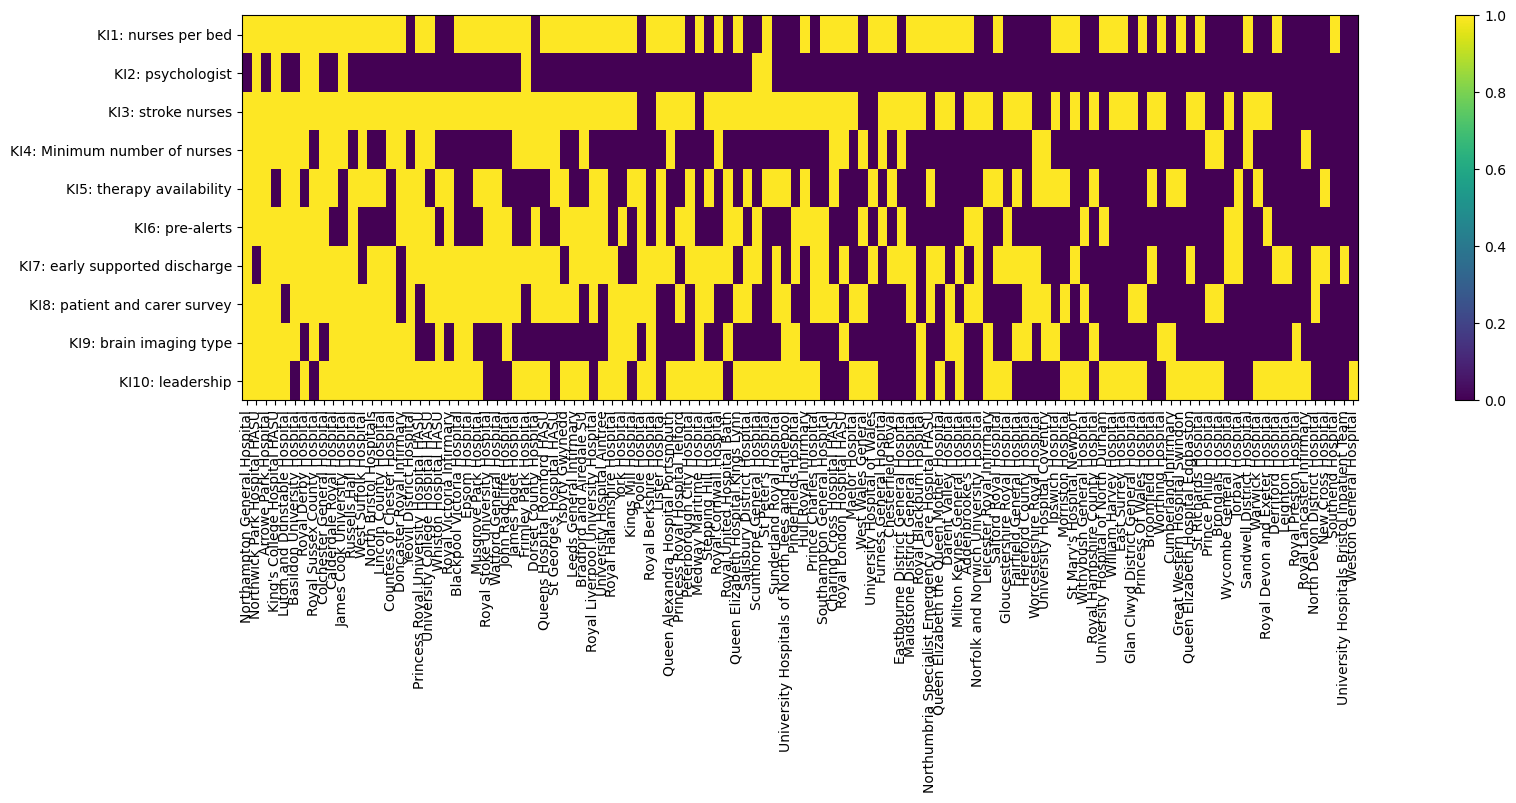

In [25]:
fig, ax = plt.subplots(figsize=(25, 5))

c = ax.imshow(df[cols].T, interpolation='None')
plt.colorbar(c)

ax.set_yticks(np.arange(len(cols)))
ax.set_xticks(np.arange(len(units)))
ax.set_yticklabels(ki_group_names)#, rotation=90)
ax.set_xticklabels(units, rotation=90)

ax.set_aspect(4)

plt.show()

In [26]:
# How many teams meet each key indicator?
ki_count = []
for col in cols_ki:
    count = df[col].sum(axis=0)
    ki_count.append(count)

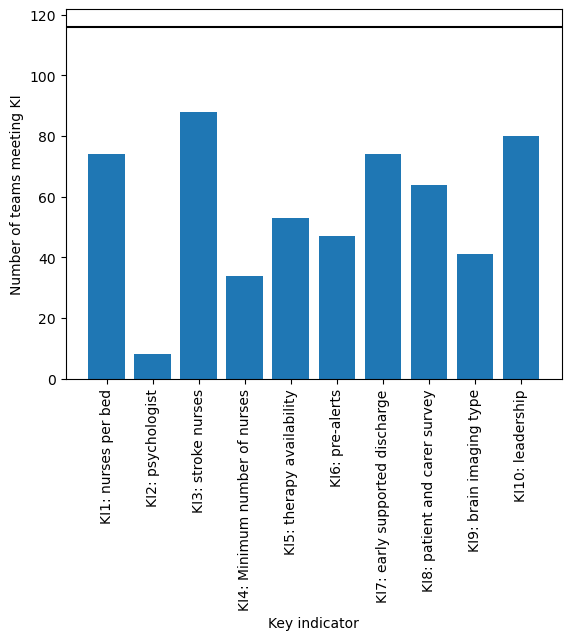

In [27]:
fig, ax = plt.subplots()

ax.bar(np.arange(len(cols_ki)), ki_count)

ax.set_xticks(np.arange(len(cols_ki)))
ax.set_xticklabels(ki_group_names, rotation=90)

ax.set_ylabel('Number of teams meeting KI')
ax.set_xlabel('Key indicator')

ax.axhline(len(df), color='k')

plt.show()